In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("loan_Data.csv",index_col=0)
df.head()

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,,,,,,,,,,,,,
1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
X = df.drop(['not.fully.paid', 'purpose'], axis=1)
df=df.rename(index=str, columns={"not.fully.paid": "not_fully_paid"})
y = df.not_fully_paid
print(X)
print(y)

               int.rate  installment  log.annual.inc    dti  fico  \
credit.policy                                                       
1                0.1189       829.10       11.350407  19.48   737   
1                0.1071       228.22       11.082143  14.29   707   
1                0.1357       366.86       10.373491  11.63   682   
1                0.1008       162.34       11.350407   8.10   712   
1                0.1426       102.92       11.299732  14.97   667   
1                0.0788       125.13       11.904968  16.98   727   
1                0.1496       194.02       10.714418   4.00   667   
1                0.1114       131.22       11.002100  11.08   722   
1                0.1134        87.19       11.407565  17.25   682   
1                0.1221        84.12       10.203592  10.00   707   
1                0.1347       360.43       10.434116  22.09   677   
1                0.1324       253.58       11.835009   9.16   662   
1                0.0859       316.

In [4]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS']test_size=0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1999   15]
 [ 375    6]]
             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2014
          1       0.29      0.02      0.03       381

avg / total       0.75      0.84      0.77      2395



In [16]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

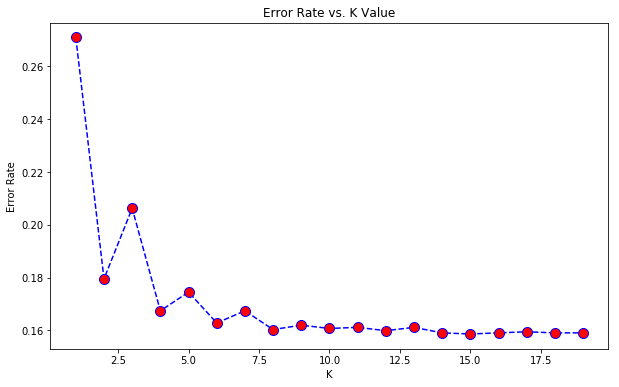

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1670  344]
 [ 305   76]]


             precision    recall  f1-score   support

          0       0.85      0.83      0.84      2014
          1       0.18      0.20      0.19       381

avg / total       0.74      0.73      0.73      2395



In [19]:
# NOW WITH K=7 <<< As seen from the plot >>>
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[2014    0]
 [ 380    1]]


             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2014
          1       1.00      0.00      0.01       381

avg / total       0.87      0.84      0.77      2395



In [20]:
from sklearn.model_selection import cross_val_score 

accuracies_knn= cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10) 
accuracies_knn_mean=accuracies_knn.mean()*100
print("Mean Accuracy:KNN=",accuracies_knn_mean)

accuracies_knn_std=accuracies_knn.std()*100
print("Standard Deviation - Accuracy:KNN=",accuracies_knn_std)

Mean Accuracy:KNN= 83.96216653774349
Standard Deviation - Accuracy:KNN= 0.07542501670292674
